# 1 Descriptive Statistics

## 1.1
In the following section an Excel file containing mortality rate associated with the hypertensive heart disease in the United States across different age groups and sexes will be processed (Data was downloaded from WHO website). We will extract total mortality rate per year for male (1951 - 2019) and female (1951 - 2019) populations separately.   

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

myData = np.array(pd.read_excel('Mortality_Hypertension_America.xlsx'))



In [3]:
print(type(myData))
print(myData.shape)


<class 'numpy.ndarray'>
(4388, 9)


In [4]:


# Extraxt total mortality for male population into a two dimensional array. 
# column 0: year, colomn 1: gender ('Male', column 2: yearly mortality
M = np.array([row[[1,2,5]] for row in myData if row[2] == 'Male' and row[3] == 'Age_all'])

# Extraxt total mortality for female population into a two dimensional array. 
# column 0: year, colomn 1: gender ('Female', column 2: yearly mortality
F = np.array([row[[1,2,5]] for row in myData if row[2] == 'Female' and row[3] == 'Age_all'])
F = F[1:,:] # Make sure data starts from year 1951

In [6]:
print(M.shape)
print(F.shape)

(69, 3)
(69, 3)


## 1.2

Write your own python code to calculate the following sample statistics for the yearly mortality for the male poulation and print your result to the screen:

- Mean
- Variance
- Standard deviation
- Skewness
- Kurtosis
- Quantiles (First , median, and tird quartiles)

In [13]:
print(M[:,2].shape)

print('Mean: ', np.mean(M[:,2])) 

def custom_mean(dist):
    running_sum = 0
    for iSample in range(dist.shape[0]):
        running_sum += dist[iSample]
    return running_sum / dist.shape[0]

print('Custom Mean: ', custom_mean(M[:,2]))

def other_custom_mean(dist):
    return np.sum(dist) / dist.shape[0]

print('Other Custom Mean: ', other_custom_mean(M[:,2]))

    


(69,)
Mean:  21641.304347826088
Custom Mean:  21641.304347826088
Other Custom Mean:  21641.304347826088


In [17]:


class StatDistribution:
    
    
    def __init__(self, data):
        """
        class constructor with two object variables (sample one dimensional data)

        Parameters
        ----------
        data : TYPE
            DESCRIPTION.

        Returns
        -------
        None.

        """
        
        self.input = data
        self.num_elem = np.size(data)
        
        
    def mean(self):
        """
        Calculates sample mean in one dimensional numpy array

        Returns
        -------
        float
            sample mean.

        """
        
        return sum(self.input)/self.num_elem
    
    def variance(self):
        """
        Calculates sample variance in a one dimensional numpy array

        Returns
        -------
        float
            sample variance.

        """
        
        return np.sum((self.input - self.mean())**2) / (self.num_elem - 1)
    
    def std(self):
        """
        Calculates sample standard deviation in a one dimensional numpy array

        Returns
        -------
        float
            sample standard deviation.

        """
        
        return np.sqrt(self.variance())
    
    def my_skewness(self):
        """
        Calculates adjusted Fisher-Pearson coefficient of skewness in a one dimensional numpy array

        Returns
        -------
        float
            adjusted Fisher-Pearson coefficient of skewness.

        """
        
        S3 = np.sum((self.input - self.mean())**3) / (self.num_elem)
        Q3 = (np.sum((self.input - self.mean())**2) /(self.num_elem) )**(3/2)
        
        g1 = S3/Q3
        
        return np.sqrt(self.num_elem * (self.num_elem - 1))/ (self.num_elem - 2) * (g1)
    
    def my_kurtosis(self):
        """
        Calculates adjusted Fisher coefficient of kurtosis in a one dimensional numpy array   

        Returns
        -------
        float
            adjusted Fisher coefficient of kurtosis.

        """
        
        S4 = np.sum((self.input - self.mean())**4) / (self.num_elem)
        Q4 = ((np.sum((self.input - self.mean())**2) /(self.num_elem) ))**(2)
        cor = (self.num_elem - 1)/((self.num_elem - 2)*(self.num_elem - 3))
        
        return cor* ((self.num_elem + 1) * (S4/Q4)  - 3 * (self.num_elem -1) )
    
    def quant(self, q):
        """
        Calculate quantile values

        Parameters
        ----------
        q : float
            quantile value as decimal point (Ex. for median use 0.5).

        Returns
        -------
        Quantiled value in the array.

        """
        
        data_sort = sorted(self.input)
        
        ind = self.num_elem*q
        
        if ind //1 == ind /1:
            
            return data_sort[int( ind + 0.5)]
        return data_sort[int( np.ceil(ind))]
            



myStatDistribution = StatDistribution(M[:,2])

print("**** My estimation****\n")

# print(f"{'Mean:':<25} {myStatDistribution.mean()}\n"
#       f"{'Variance:':<25} {myStatDistribution.variance()} \n"
#       f"{'Standard Deviation:':<25} {myStatDistribution.std()} \n"
#       f"{'Skewnwss:':<25} {myStatDistribution.my_skewness()} \n"
#       f"{'kurtosis:':<25} {myStatDistribution.my_kurtosis()} \n"
#       f"{'First Quartile:':<25} {myStatDistribution.quant(0.25)} \n"
#       f"{'Median:':<25} {myStatDistribution.quant(0.5)} \n"
#       f"{'Third Quartile:':<25} {myStatDistribution.quant(0.75)} \n")

# print the mean
print('Mean: ', myStatDistribution.mean())
# print the variance
print('Variance: ', myStatDistribution.variance())
# print the standard deviation
print('Standard Deviation: ', myStatDistribution.std())
# print the skewness
print('Skewness: ', myStatDistribution.my_skewness())
# print the kurtosis
print('Kurtosis: ', myStatDistribution.my_kurtosis())
# print the first quartile
print('First Quartile: ', myStatDistribution.quant(0.25))
# print the median
print('Median: ', myStatDistribution.quant(0.5))
# print the third quartile
print('Third Quartile: ', myStatDistribution.quant(0.75))




**** My estimation****

Mean:  21641.304347826088
Variance:  116718409.80306906
Standard Deviation:  10803.629473610665
Skewness:  0.6617780090260138
Kurtosis:  -0.7605130451552878
First Quartile:  13648
Median:  18408
Third Quartile:  30715


## 1.3

Use packages such as numpy and scipy to calculate the sample statistics for the male population. Are th eresults consistent with your calculation?

In [20]:
M1 = M[:,2].astype(np.float32)

print(f"{'Mean:':<25} {np.mean(M1)} \n"
      f"{'Variance:':<25} {np.var(M1,ddof=1)} \n"
      f"{'Standard Deviation:':<25} {np.std(M1,ddof=1)} \n"
      f"{'Skewness:':<25} {skew(M1, bias=False)} \n"
      f"{'kurtosis:':<25} {kurtosis(M1, bias=False)} \n"
      f"{'First Quartile:':<25} {np.quantile(M1, 0.25)} \n"
      f"{'Median (Quantile 0.5):':<25} {np.quantile(M1, 0.5)} \n"
      f"{'Median:':<25} {np.median(M1)} \n"
      f"{'Third Quartile:':<25} {np.quantile(M1, 0.75)} \n")


Mean:                     21641.3046875 
Variance:                 116718408.0 
Standard Deviation:       10803.62890625 
Skewness:                 0.6617779731750488 
kurtosis:                 -0.7605133056640625 
First Quartile:           13614.0 
Median (Quantile 0.5):    17856.0 
Median:                   17856.0 
Third Quartile:           30478.0 



# 2 Normal distribution

## 2.1 Box Plot

Statistical data analysis often uses models that assume sample data variable follows a Gaussian (normal) distribution. There are several qualitative (visualization) and quantitative methods that can be used to examine data to determine if a variable has a distribution close to the normal distribution. 

The Box Plot is a visualization method that can be used to detect if sample is not following a normal distribution. The box plot in matplotlib libary diplays the following summary statistics for the sample data:

- First qurtile - 1.5 * IQR (Inter Quartile Range)
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Third qurtile + 1.5 * IQR (Inter Quartile Range)

Here : $IQR = Q3 - Q1$

- Generate two random samples with normal distribution each contain 300 samples: 

    1. $\mathcal{N}(70,40)$
    2. $\mathcal{N}(100,10)$

- Generate box plots of these sample and compare them. (use random seed of 0)

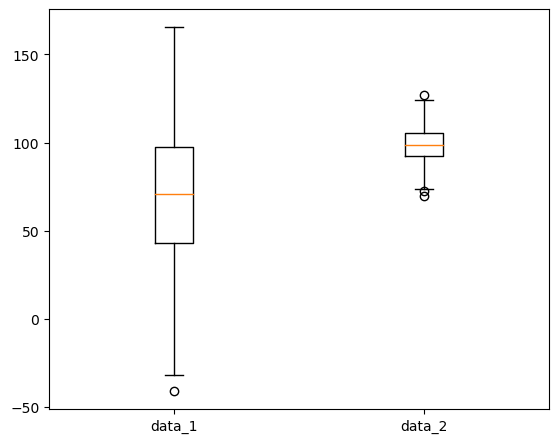

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create two normally distributed random samples
np.random.seed(0)

D1 = np.random.normal(70, 40, 300)
D2 = np.random.normal(100, 10, 300)
Data = [D1, D2]

fig = plt.figure(figsize =(5, 4))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(Data)

# y-axis labels
ax.set_xticklabels(['data_1', 'data_2'])

 
# show plot
plt.show()

Perform box plot on the male and female sample data. What can you learn from these plots?

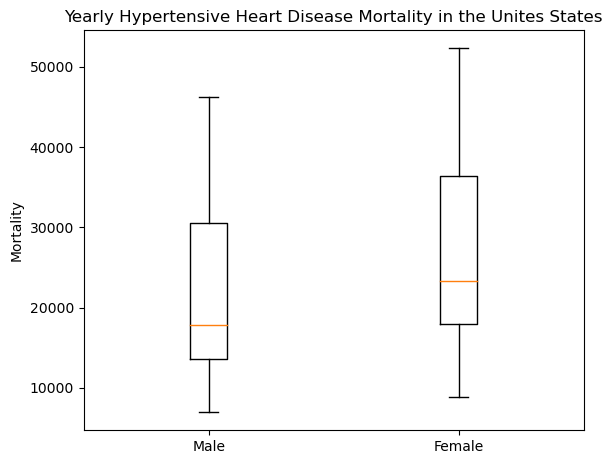

In [23]:
import matplotlib.pyplot as plt



fig = plt.figure(figsize =(5, 4))

Data = [M[:,2], F[:,2]]
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(Data)

# x-axis labels
ax.set_xticklabels(['Male', 'Female'])

# y-axis label
ax.set_ylabel('Mortality')

# Title

ax.set_title('Yearly Hypertensive Heart Disease Mortality in the Unites States')


 
# show plot
plt.show()

To get a better comparison of your data, standardize your data to have zero mean and unit standard deviation. Use the box plot to illustrates the results for both male and female samples.


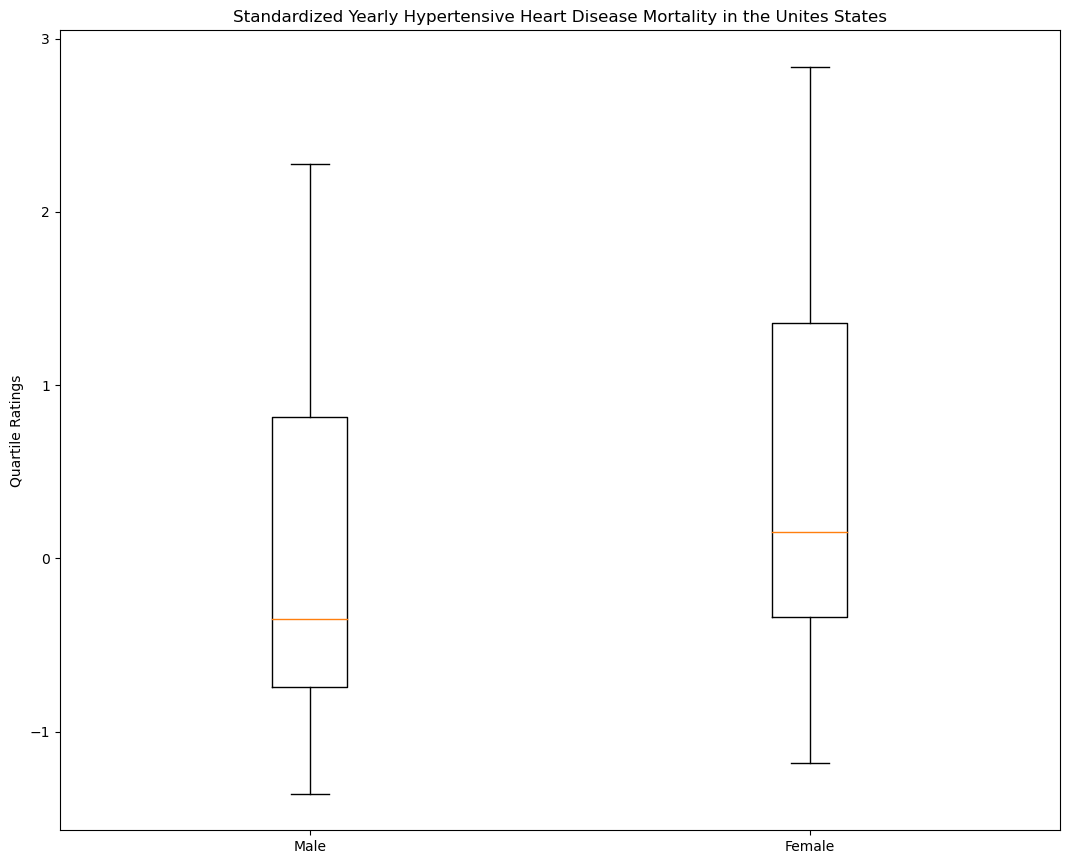

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 8))


# generate class pbject for the male mortality samples
pM = StatDistribution(M[:,2])

# Normalize data to zero mean and unit standard deviation
M_norm = (M[:,2] - p.mean() )/ p.std()

# Repeat for female population

pF = StatDistribution(F[:,2])
F_norm = (F[:,2] - p.mean() )/ p.std()

Data_norm = [M_norm, F_norm]
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(Data_norm)

# x-axis labels
ax.set_xticklabels(['Male', 'Female'])

# y-axis label
ax.set_ylabel('Quartile Ratings')

# Title

ax.set_title('Standardized Yearly Hypertensive Heart Disease Mortality in the Unites States')


 
# show plot
plt.show()

## 2.2 Violin Plot

Violin plots provide additional information by adding a density trace. Use the mortality values for male and female samples and draw a side-by-side plot of violin and box plot. How do you interpret your result?

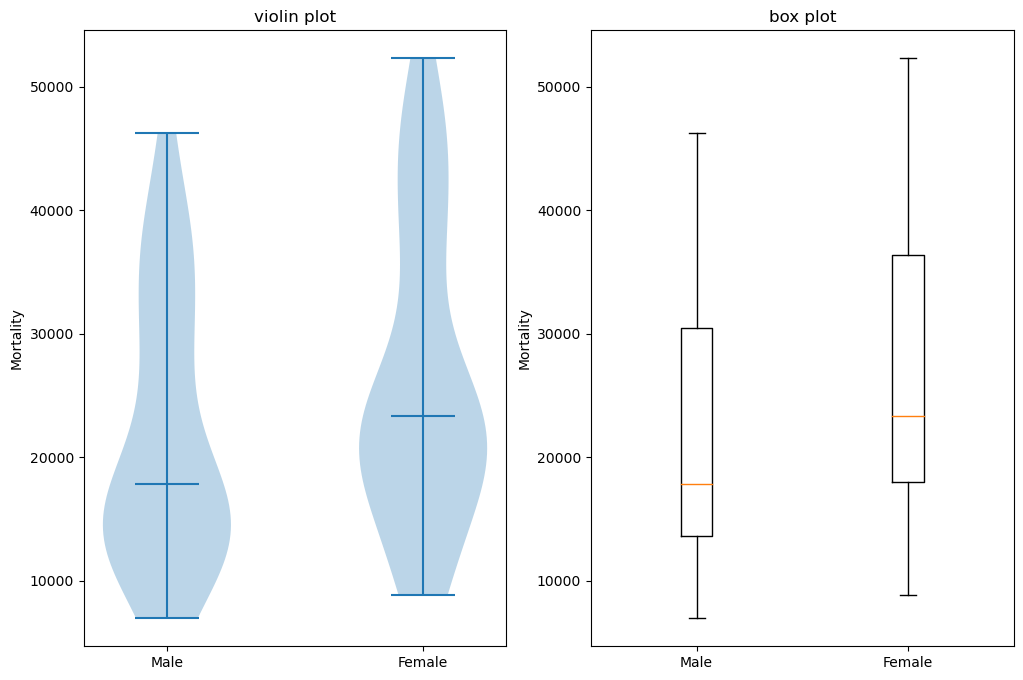

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(12,8))

# generate combined data for male and female convert them float from object
Data = [M[:,2].astype(float), F[:,2].astype(float)]

# plot Violin plot
axes[0].violinplot(Data, showmeans=False, showmedians=True)
axes[0].set_title('violin plot')
axes[0].set_xticks([1,2])
axes[0].set_xticklabels(['Male', 'Female'])
axes[0].set_ylabel('Mortality')

# plot Box plot
axes[1].boxplot(Data)
axes[1].set_title('box plot')
axes[1].set_xticklabels(['Male', 'Female'])
axes[1].set_ylabel('Mortality')


# show plot
plt.show()



## 2.3 Q-Q plot

Q-Q plot or quantile-quantile plot is another visualization tool to determine if a set of random data is initiated from some pre-difeind theoritical distribution (Ex. normal distribution). In python, we could use **probplot** method from scipy.stats to generate Q-Q plots. 

- First generate Q-Q plot for a $\mathcal{N}(50,10)$ distribution by using 1000 sample. (Use a seed value of zero). 
- Then generate Q-Q plot for male and female mortality samples. Make sure to standardized your data first.

How do you interpret your result?

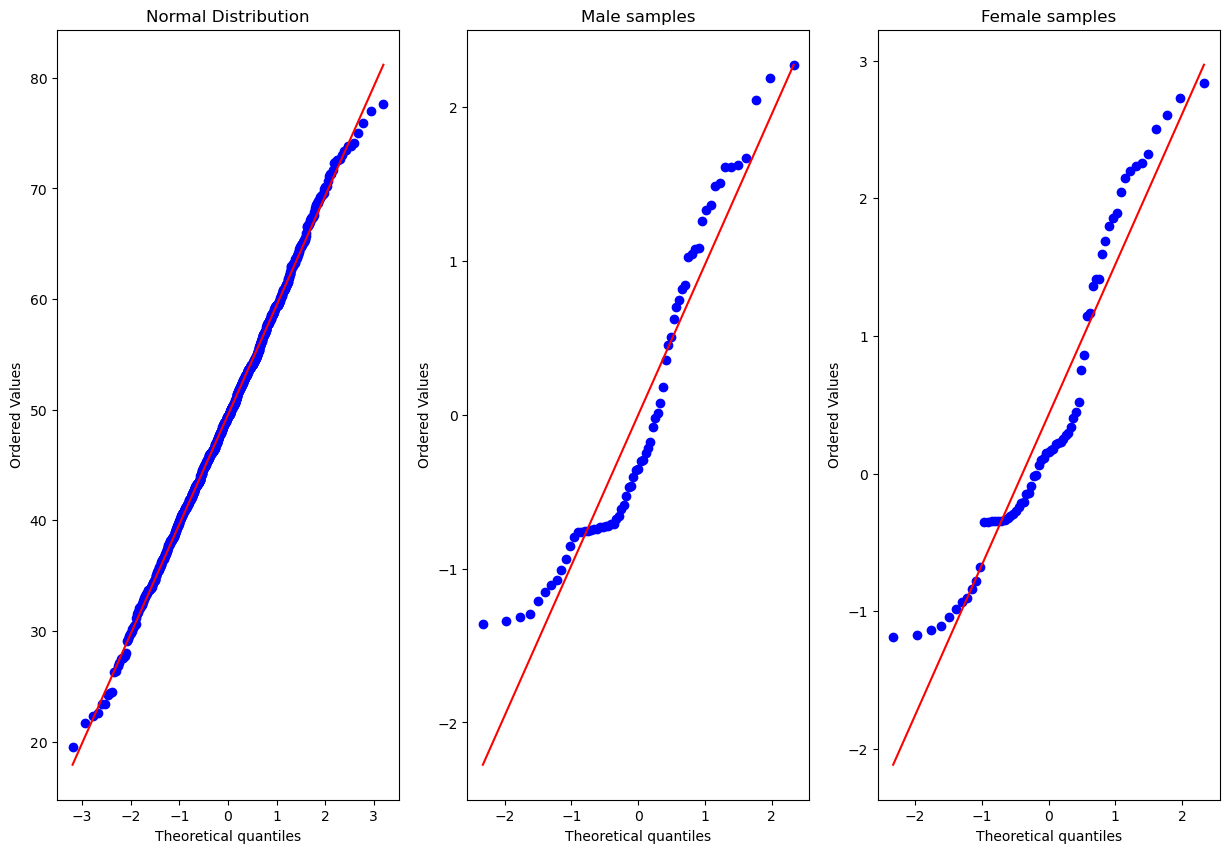

In [9]:
#import statsmodels.api as sm # another package
import matplotlib.pyplot as plt
import scipy.stats as stats


#fig = sm.qqplot(M_norm, line='45')

fig = plt.figure(figsize =(15, 10))

# generate 1000 samples from normal distribution with zero mean and unit standard deviation
np.random.seed(0)
data = np.random.normal(50,10,1000)
plt.subplot(1, 3, 1)
stats.probplot(data.astype(float), dist="norm", plot=plt)
plt.title('Normal Distribution')

# plot standardized male population mortality samples against normal distribution

plt.subplot(1, 3, 2)
stats.probplot(M_norm.astype(float), dist="norm", plot=plt)
plt.title('Male samples')

# plot standardized female population mortality samples against normal distribution

plt.subplot(1, 3, 3)
stats.probplot(F_norm.astype(float), dist="norm", plot=plt)
plt.title('Female samples')

plt.show()

